In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs
import cmaps
from matplotlib import cm, colors, ticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pylab as pl

In [135]:
data_dir='/Users/hass877/Work/data_analysis/'
era_ml = xr.open_dataset(data_dir+'ERA5_640x1280_to_E3SM_ne30pg2_L72_northamericax4v1pg2.2009-04-01-00000.nc',decode_times=False)
era_pl = xr.open_dataset(data_dir+'ERA5_721x1440_to_E3SM_ne30pg2_L72_northamericax4v1pg2.2009-04-01-00000.nc',decode_times=False)
grid_data = xr.open_dataset(data_dir+'cmip6_mam4_bc_a4_surf_2000_c20191108_384x576_northamericax4v1pg2.nc')
lat = grid_data['lat']
lon = grid_data['lon']
# U Bottom level
era_ml_U = era_ml['U'][0][-1]
era_pl_U = era_pl['U'][0][-1]
era_U_diff = era_ml_U-era_pl_U
print(era_ml_U.shape,era_pl_U.shape,era_U_diff.shape)

(57816,) (57816,) (57816,)


In [168]:
# Func to plot SE data
def get_se_plot(lat,lon,era_ml_U,ax,ml='ml',ptype='pcolor'):
    new_lon = lon.copy(deep=True)
    new_lon.values = np.where(lon > 180, lon - 360, lon)
    ml_lon = new_lon.where(era_ml_U.squeeze().notnull()).dropna('ncol')
    ml_lat = lat.where(era_ml_U.squeeze().notnull()).dropna('ncol')
    era_ml_U = era_ml_U.squeeze().dropna('ncol')
    ax.set_global()
    ax.coastlines(lw=1, resolution='50m')
    if ptype=='pcolor':
        pl=ax.tripcolor(ml_lon.squeeze(), ml_lat.squeeze(), era_ml_U.squeeze(),transform=crs.PlateCarree(),\
                    norm=colors.CenteredNorm(),\
                    cmap='RdBu_r')
    else:
        pl=ax.tricontourf(ml_lon.squeeze(), ml_lat.squeeze(), era_ml_U.squeeze(),transform=crs.PlateCarree(),\
                    norm=colors.CenteredNorm(),\
                    cmap='RdBu_r',robust=True)
    gl = ax.gridlines(draw_labels=True)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabels_top = gl.ylabels_right = False
    gl.xlines = gl.ylines = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    plt.title('U '+ml+' ['+str(np.round(era_ml_U.lev.values,2))+'hpa]')
    return pl

def get_se_plot_log(lat,lon,era_ml_U,ax,ml='ml',ptype='pcolor'):
    new_lon = lon.copy(deep=True)
    new_lon.values = np.where(lon > 180, lon - 360, lon)
    ml_lon = new_lon.where(era_ml_U.squeeze().notnull()).dropna('ncol')
    ml_lat = lat.where(era_ml_U.squeeze().notnull()).dropna('ncol')
    era_ml_U = era_ml_U.squeeze().dropna('ncol')
    ax.set_global()
    ax.coastlines(lw=1, resolution='50m')
    if ptype=='pcolor':
        pl=ax.tripcolor(ml_lon.squeeze(), ml_lat.squeeze(), era_ml_U.squeeze(),transform=crs.PlateCarree(),\
                    norm=colors.LogNorm(vmin=210,vmax=350),\
                    cmap=cmaps.WhiteBlueGreenYellowRed)
    else:
        pl=ax.tricontourf(ml_lon.squeeze(), ml_lat.squeeze(), era_ml_U.squeeze(),transform=crs.PlateCarree(),\
                    norm=colors.CenteredNorm(),\
                    cmap='RdBu_r',robust=True)
    gl = ax.gridlines(draw_labels=True)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabels_top = gl.ylabels_right = False
    gl.xlines = gl.ylines = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    plt.title('U '+ml+' ['+str(np.round(era_ml_U.lev.values,2))+'hpa]')
    return pl

def get_se_plot_lim(lat,lon,era_ml_U,ax,ml='ml',mn=-35,mx=35):
    new_lon = lon.copy(deep=True)
    new_lon.values = np.where(lon > 180, lon - 360, lon)
    ml_lon = new_lon.where(era_ml_U.squeeze().notnull()).dropna('ncol')
    ml_lat = lat.where(era_ml_U.squeeze().notnull()).dropna('ncol')
    era_ml_U = era_ml_U.squeeze().dropna('ncol')
    ax.set_global()
    ax.coastlines(lw=1, resolution='50m')
    pl=ax.tripcolor(ml_lon.squeeze(), ml_lat.squeeze(), era_ml_U.squeeze(),transform=crs.PlateCarree(),\
                vmin=mn,vmax=mx,\
                cmap='RdBu_r')
    gl = ax.gridlines(draw_labels=True)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabels_top = gl.ylabels_right = False
    gl.xlines = gl.ylines = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    plt.title('U '+ml+' ['+str(np.round(era_ml_U.lev.values,2))+'hpa]')
    return pl

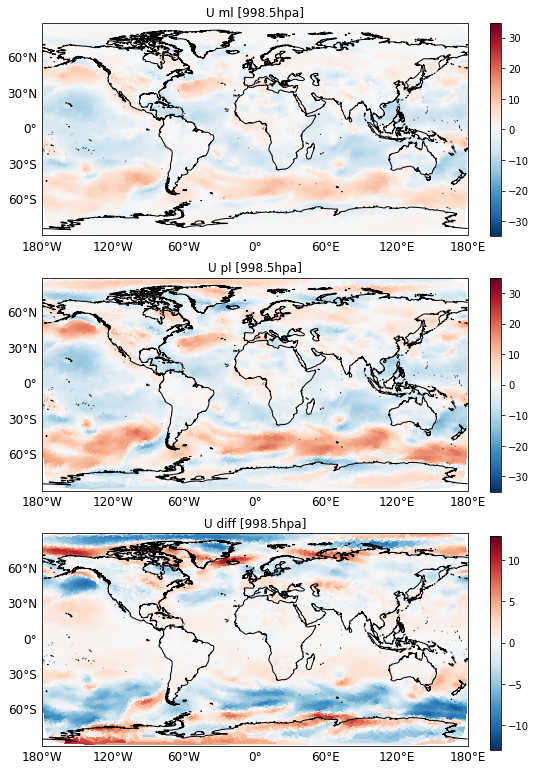

In [136]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8,18))
## ml
ax=plt.subplot(411,projection=crs.PlateCarree())
pl=get_se_plot_lim(lat,lon,era_ml_U,ax)
cax=plt.axes([0.92,0.715,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
## pl
ax=plt.subplot(412,projection=crs.PlateCarree())
pl=get_se_plot_lim(lat,lon,era_pl_U,ax,ml='pl')
cax=plt.axes([0.92,0.518,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
## diff=ml-pl
ax=plt.subplot(413,projection=crs.PlateCarree())
pl=get_se_plot(lat,lon,era_U_diff,ax,ml='diff')
cax=plt.axes([0.92,0.319,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())

In [137]:
# Top Level
era_ml_U = era_ml['U'][0][0]
era_pl_U = era_pl['U'][0][0]
era_U_diff = era_ml_U-era_pl_U
print(era_ml_U.shape,era_pl_U.shape,era_U_diff.shape)

(57816,) (57816,) (57816,)


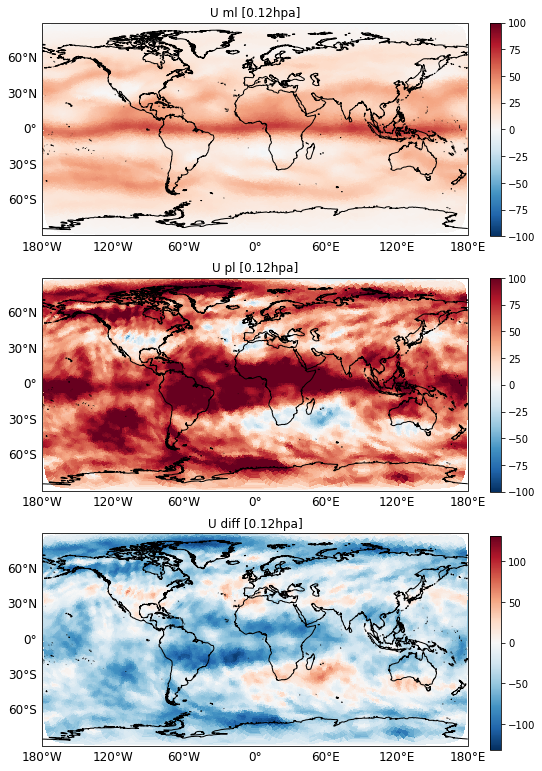

In [140]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8,18))
## ml
ax=plt.subplot(411,projection=crs.PlateCarree())
pl=get_se_plot_lim(lat,lon,era_ml_U,ax,mn=-100,mx=100)
cax=plt.axes([0.92,0.715,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
## pl
ax=plt.subplot(412,projection=crs.PlateCarree())
pl=get_se_plot_lim(lat,lon,era_pl_U,ax,ml='pl',mn=-100,mx=100)
cax=plt.axes([0.92,0.518,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
## diff
ax=plt.subplot(413,projection=crs.PlateCarree())
pl=get_se_plot(lat,lon,era_U_diff,ax,ml='diff')
cax=plt.axes([0.92,0.319,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())

(57816,) (57816,) (57816,)


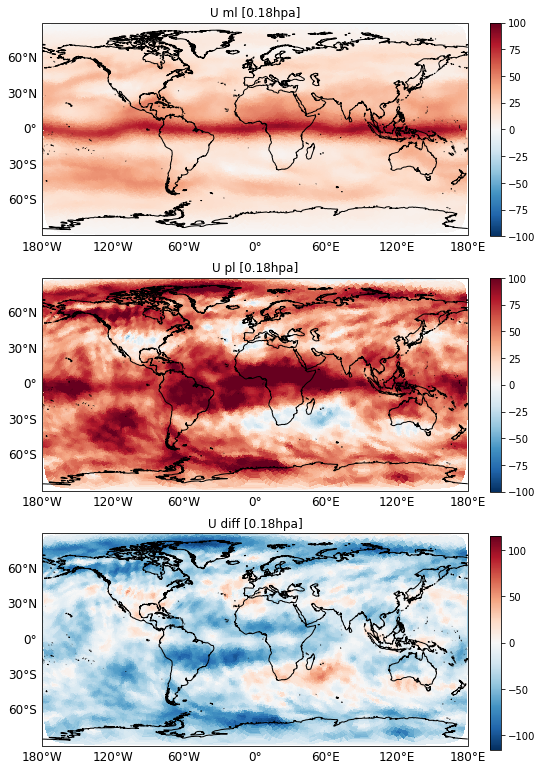

In [141]:
# Top 2nd Level
era_ml_U = era_ml['U'][0][1]
era_pl_U = era_pl['U'][0][1]
era_U_diff = era_ml_U-era_pl_U
print(era_ml_U.shape,era_pl_U.shape,era_U_diff.shape)
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8,18))
## ml
ax=plt.subplot(411,projection=crs.PlateCarree())
pl=get_se_plot_lim(lat,lon,era_ml_U,ax,mn=-100,mx=100)
cax=plt.axes([0.92,0.715,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
## pl
ax=plt.subplot(412,projection=crs.PlateCarree())
pl=get_se_plot_lim(lat,lon,era_pl_U,ax,ml='pl',mn=-100,mx=100)
cax=plt.axes([0.92,0.518,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
## diff
ax=plt.subplot(413,projection=crs.PlateCarree())
pl=get_se_plot(lat,lon,era_U_diff,ax,ml='diff')
cax=plt.axes([0.92,0.319,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())

(57816,) (57816,) (57816,)


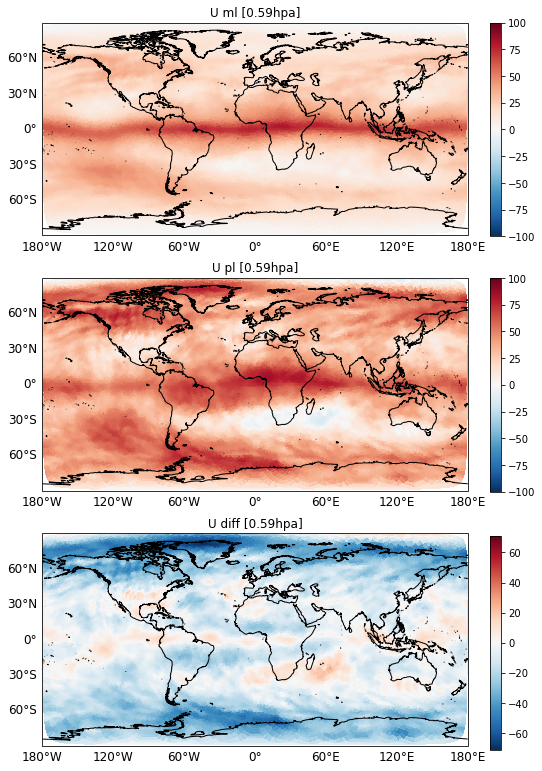

In [142]:
# Top 5th Level
era_ml_U = era_ml['U'][0][4]
era_pl_U = era_pl['U'][0][4]
era_U_diff = era_ml_U-era_pl_U
print(era_ml_U.shape,era_pl_U.shape,era_U_diff.shape)
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8,18))
## ml
ax=plt.subplot(411,projection=crs.PlateCarree())
pl=get_se_plot_lim(lat,lon,era_ml_U,ax,mn=-100,mx=100)
cax=plt.axes([0.92,0.715,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
## pl
ax=plt.subplot(412,projection=crs.PlateCarree())
pl=get_se_plot_lim(lat,lon,era_pl_U,ax,ml='pl',mn=-100,mx=100)
cax=plt.axes([0.92,0.518,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
## diff
ax=plt.subplot(413,projection=crs.PlateCarree())
pl=get_se_plot(lat,lon,era_U_diff,ax,ml='diff')
cax=plt.axes([0.92,0.319,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())

(57816,) (57816,) (57816,)


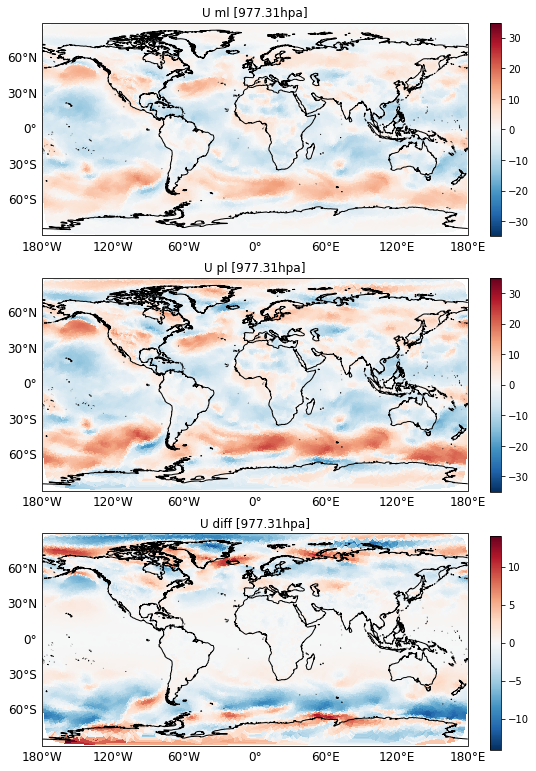

In [128]:
# bottom 4th Level
era_ml_U = era_ml['U'][0][-4]
era_pl_U = era_pl['U'][0][-4]
era_U_diff = era_ml_U-era_pl_U
print(era_ml_U.shape,era_pl_U.shape,era_U_diff.shape)
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8,18))
## ml
ax=plt.subplot(411,projection=crs.PlateCarree())
pl=get_se_plot_lim(lat,lon,era_ml_U,ax)
cax=plt.axes([0.92,0.715,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
## pl
ax=plt.subplot(412,projection=crs.PlateCarree())
pl=get_se_plot_lim(lat,lon,era_pl_U,ax,ml='pl')
cax=plt.axes([0.92,0.518,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
## diff
ax=plt.subplot(413,projection=crs.PlateCarree())
pl=get_se_plot(lat,lon,era_U_diff,ax,ml='diff')
cax=plt.axes([0.92,0.319,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())

(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)


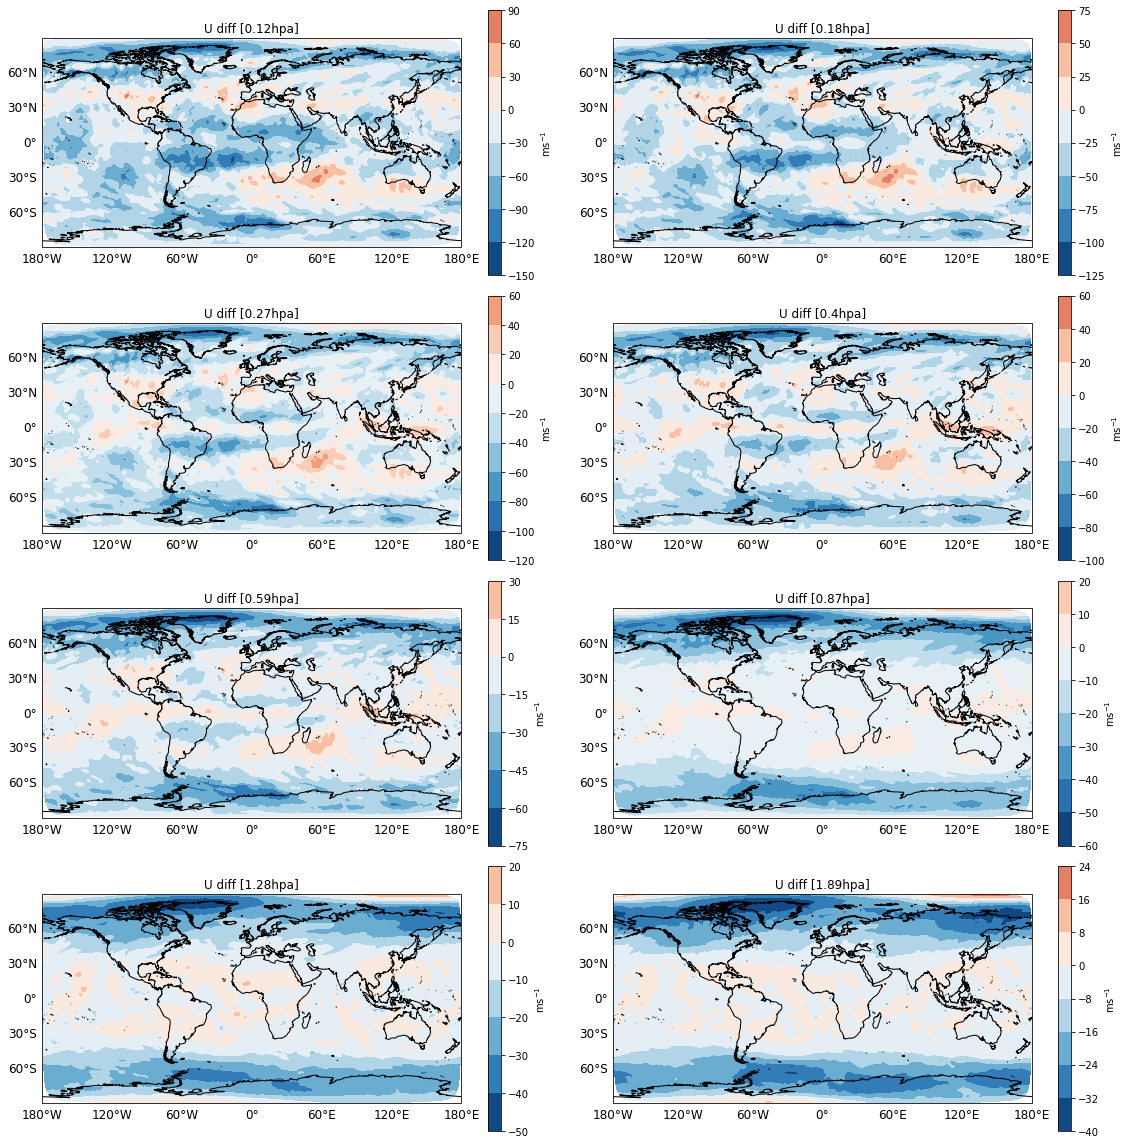

In [170]:
# Top 8 Levels
i=0
plt.figure(figsize=(16,16))
for lev in range(8):
    era_ml_U = era_ml['U'][0][lev]
    era_pl_U = era_pl['U'][0][lev]
    era_U_diff = era_ml_U-era_pl_U
    print(era_ml_U.shape,era_pl_U.shape,era_U_diff.shape)
    import warnings
    warnings.filterwarnings("ignore")
    ## diff
    ax=plt.subplot(420+i+1,projection=crs.PlateCarree())
    pl=get_se_plot(lat,lon,era_U_diff,ax,ml='diff',ptype='contourf')
    cbar=plt.colorbar(pl, orientation='vertical',label='ms$^{-1}$') 
    i=i+1
plt.tight_layout()

(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)


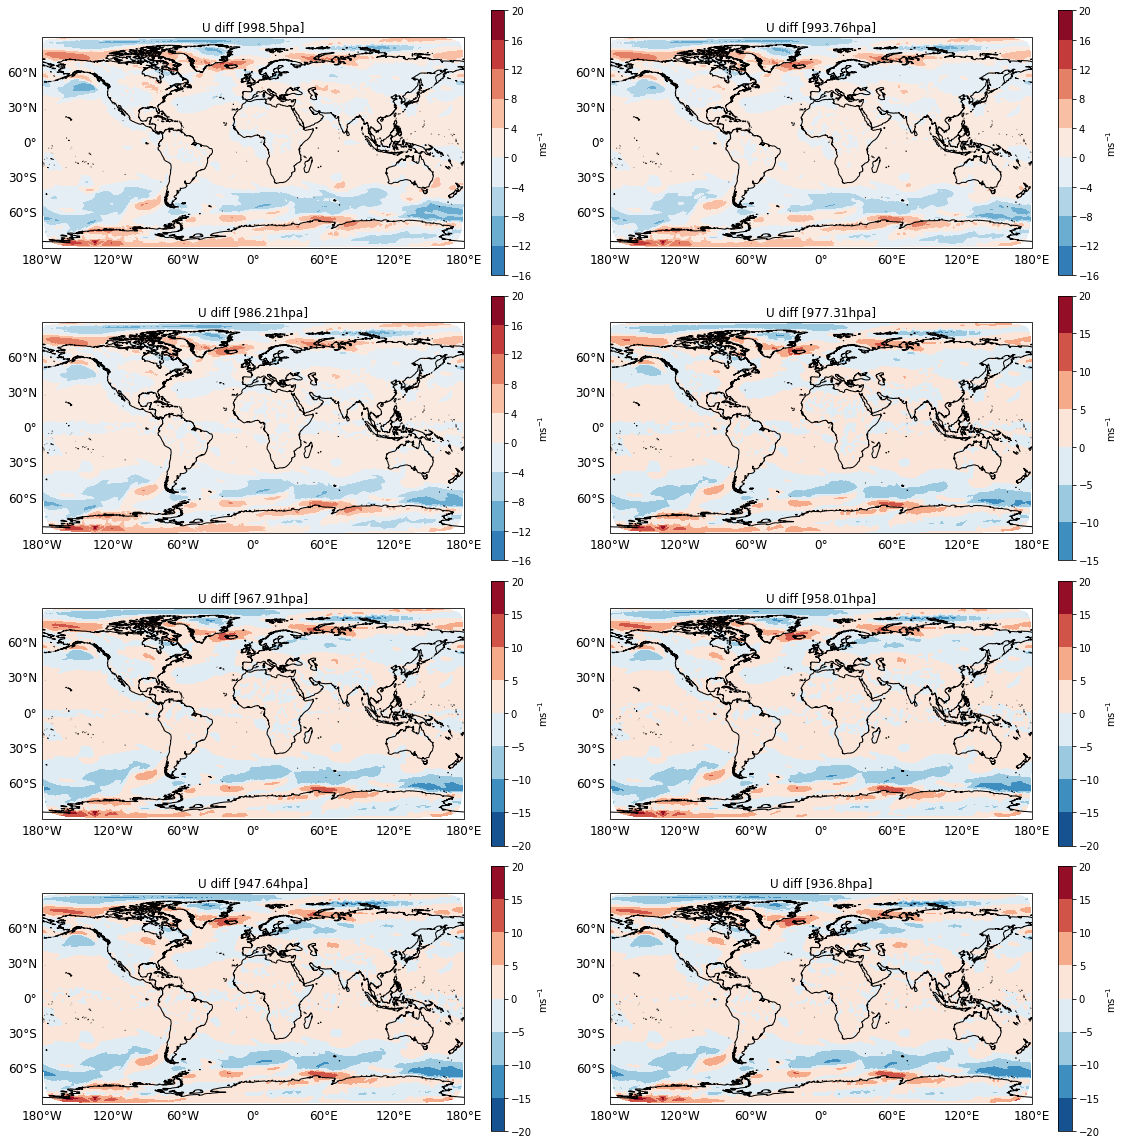

In [171]:
# Bottom 8 Levels
i=0
plt.figure(figsize=(16,16))
for lev in range(1,9):
    era_ml_U = era_ml['U'][0][-1*lev]
    era_pl_U = era_pl['U'][0][-1*lev]
    era_U_diff = era_ml_U-era_pl_U
    print(era_ml_U.shape,era_pl_U.shape,era_U_diff.shape)
    import warnings
    warnings.filterwarnings("ignore")
    ## diff
    ax=plt.subplot(420+i+1,projection=crs.PlateCarree())
    pl=get_se_plot(lat,lon,era_U_diff,ax,ml='diff',ptype='contour')
    cbar=plt.colorbar(pl, orientation='vertical',label='ms$^{-1}$') 
    i=i+1
plt.tight_layout()

(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)


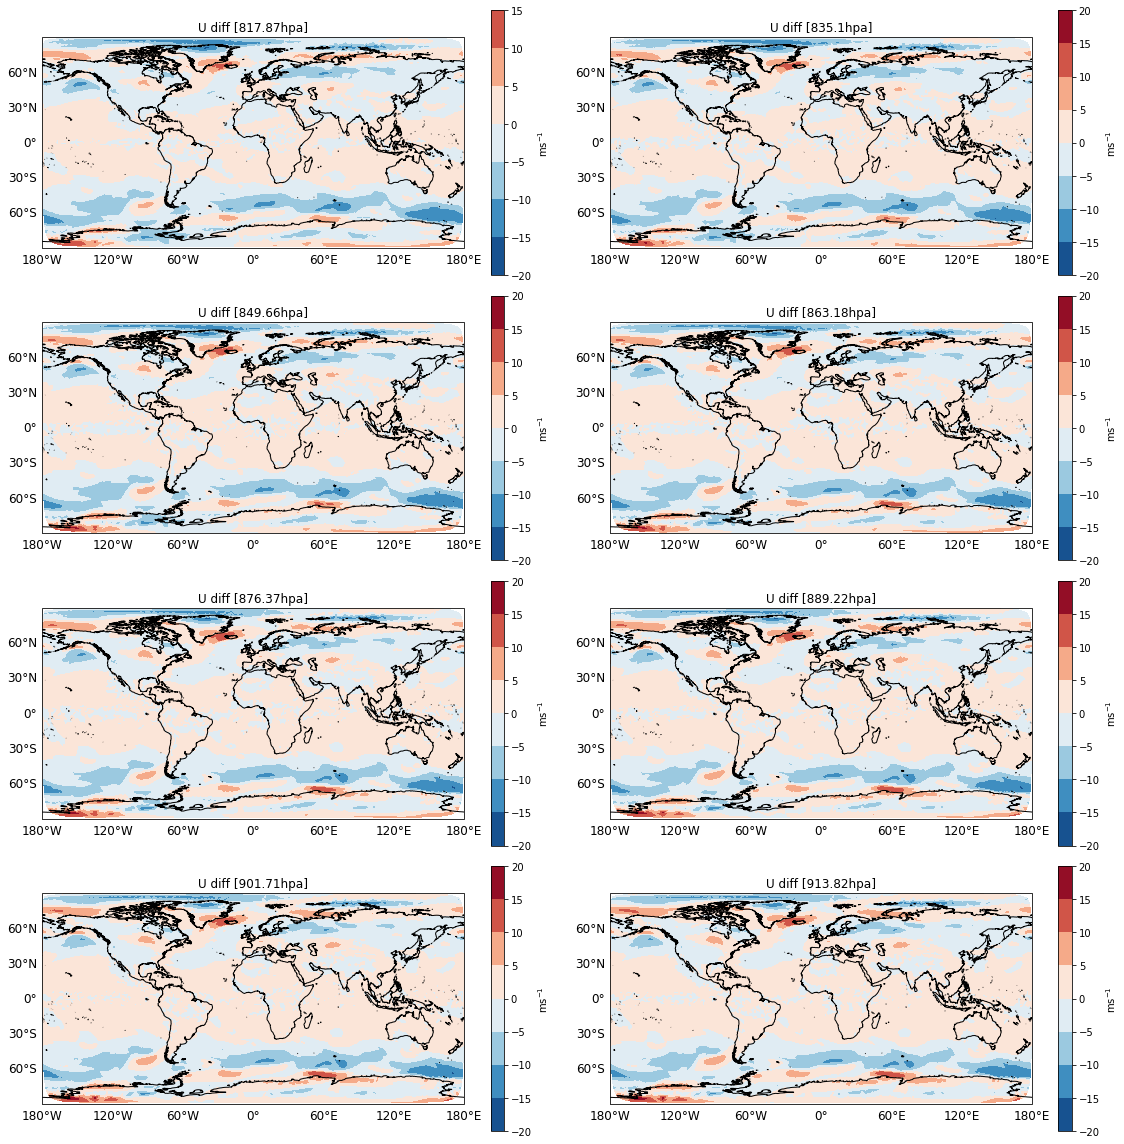

In [172]:
# Middle 8 Levels (around 850hpa)
i=0
plt.figure(figsize=(16,16))
for lev in range(55,63):
    era_ml_U = era_ml['U'][0][lev]
    era_pl_U = era_pl['U'][0][lev]
    era_U_diff = era_ml_U-era_pl_U
    print(era_ml_U.shape,era_pl_U.shape,era_U_diff.shape)
    import warnings
    warnings.filterwarnings("ignore")
    ## diff
    ax=plt.subplot(420+i+1,projection=crs.PlateCarree())
    pl=get_se_plot(lat,lon,era_U_diff,ax,ml='diff',ptype='contour')
    cbar=plt.colorbar(pl, orientation='vertical',label='ms$^{-1}$') 
    i=i+1
plt.tight_layout()

(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)
(57816,) (57816,) (57816,)


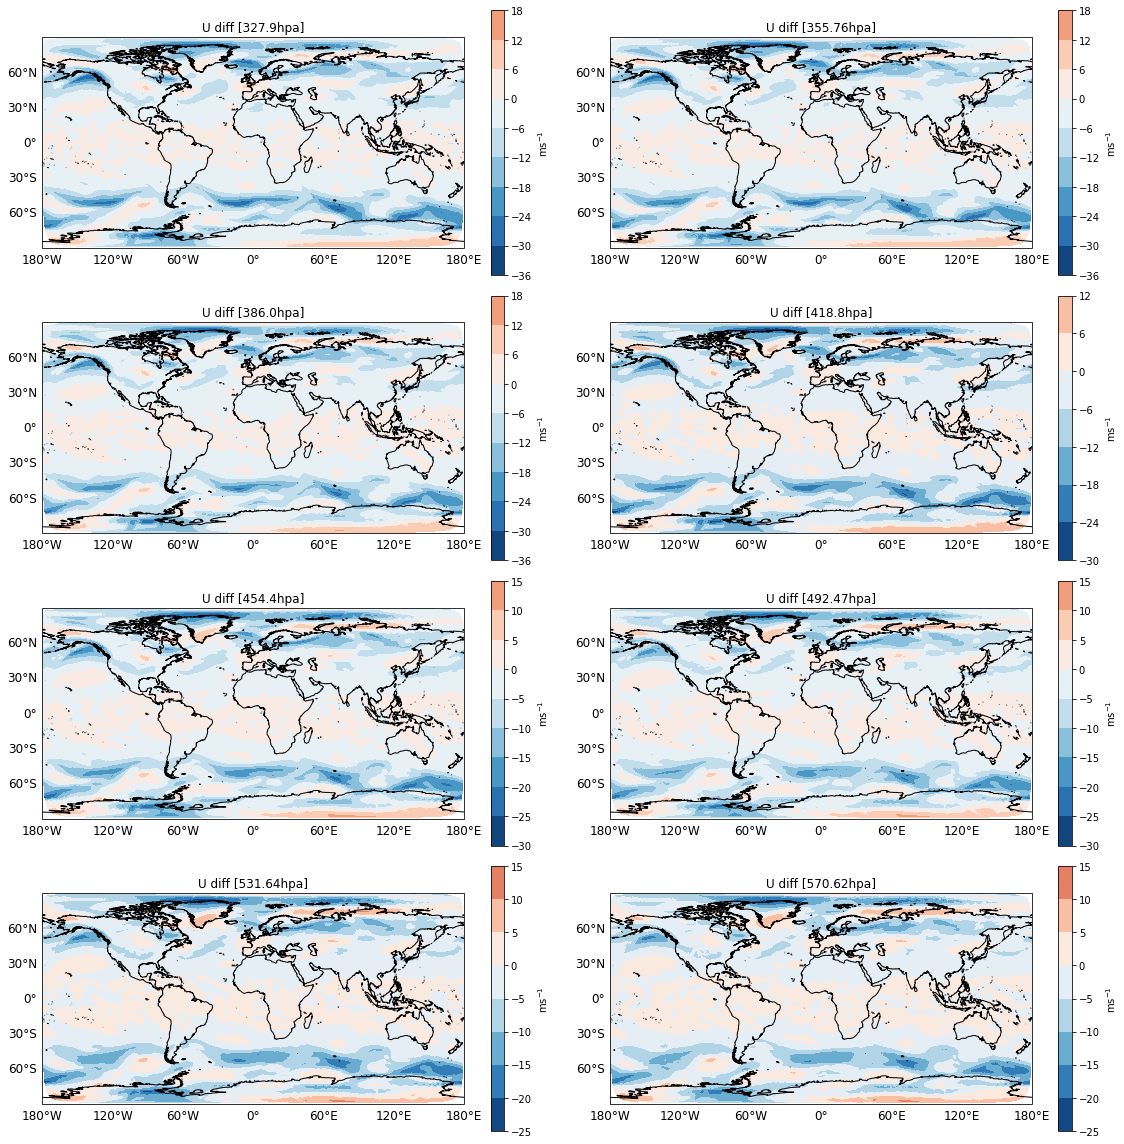

In [173]:
# Middle 8 Levels (around 500hpa)
i=0
plt.figure(figsize=(16,16))
for lev in range(40,48):
    era_ml_U = era_ml['U'][0][lev]
    era_pl_U = era_pl['U'][0][lev]
    era_U_diff = era_ml_U-era_pl_U
    print(era_ml_U.shape,era_pl_U.shape,era_U_diff.shape)
    import warnings
    warnings.filterwarnings("ignore")
    ## diff
    ax=plt.subplot(420+i+1,projection=crs.PlateCarree())
    pl=get_se_plot(lat,lon,era_U_diff,ax,ml='diff',ptype='contour')
    cbar=plt.colorbar(pl, orientation='vertical',label='ms$^{-1}$') 
    i=i+1
plt.tight_layout()

(57816,) (57816,) (57816,)


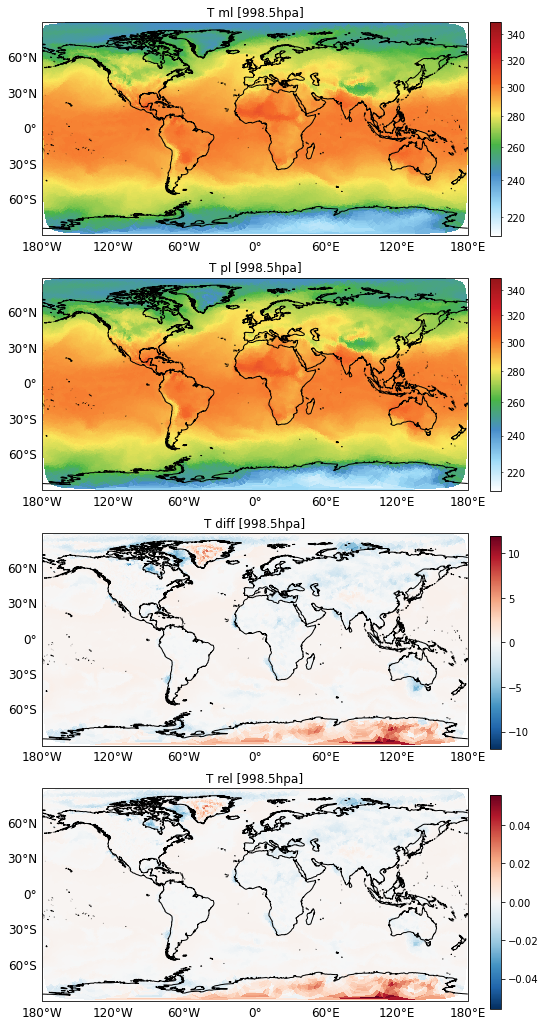

In [146]:
# Bottom level T
era_ml_U = era_ml['T'][0][-1]
era_pl_U = era_pl['T'][0][-1]
era_U_diff = era_ml_U-era_pl_U
print(era_ml_U.shape,era_pl_U.shape,era_U_diff.shape)
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8,18))
## ml
ax=plt.subplot(411,projection=crs.PlateCarree())
pl=get_se_plot_log(lat,lon,era_ml_U,ax)
cax=plt.axes([0.92,0.715,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
## pl
ax=plt.subplot(412,projection=crs.PlateCarree())
pl=get_se_plot_log(lat,lon,era_pl_U,ax,ml='pl')
cax=plt.axes([0.92,0.518,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
## diff
ax=plt.subplot(413,projection=crs.PlateCarree())
pl=get_se_plot(lat,lon,era_U_diff,ax,ml='diff')
cax=plt.axes([0.92,0.319,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
## Rel
ax=plt.subplot(414,projection=crs.PlateCarree())
pl=get_se_plot(lat,lon,era_U_diff/abs(era_pl_U),ax,ml='rel')
cax=plt.axes([0.92,0.119,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())

(57816,) (57816,) (57816,)


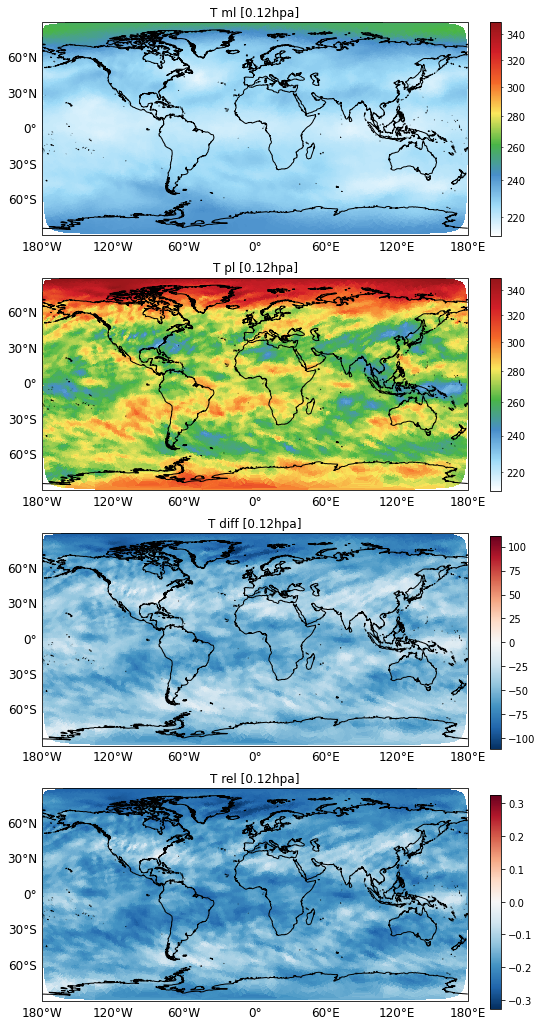

In [165]:
# Top level T
era_ml_U = era_ml['T'][0][0]
era_pl_U = era_pl['T'][0][0]
era_U_diff = era_ml_U-era_pl_U
print(era_ml_U.shape,era_pl_U.shape,era_U_diff.shape)
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8,18))
## ml
ax=plt.subplot(411,projection=crs.PlateCarree())
pl=get_se_plot_log(lat,lon,era_ml_U,ax)
cax=plt.axes([0.92,0.715,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
## pl
ax=plt.subplot(412,projection=crs.PlateCarree())
pl=get_se_plot_log(lat,lon,era_pl_U,ax,ml='pl')
cax=plt.axes([0.92,0.518,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
## diff
ax=plt.subplot(413,projection=crs.PlateCarree())
pl=get_se_plot(lat,lon,era_U_diff,ax,ml='diff')
cax=plt.axes([0.92,0.319,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
## Rel
ax=plt.subplot(414,projection=crs.PlateCarree())
pl=get_se_plot(lat,lon,era_U_diff/abs(era_pl_U),ax,ml='rel')
cax=plt.axes([0.92,0.119,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax) 
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())

In [167]:
era_ml['U'][0]

<xarray.DataArray 'U' (lev: 72, ncol: 57816)>
[4162752 values with dtype=float32]
Coordinates:
    time     float64 0.0
  * lev      (lev) float64 0.1238 0.1828 0.2699 0.3986 ... 986.2 993.8 998.5
Dimensions without coordinates: ncol
Attributes:
    long_name:          Zonal wind
    units:              m/s
    source_file:        /global/cscratch1/sd/zhan391/SciDAC_m3089/acme_init/e...
    source_field_name:  U
    horz_interp_flag:   conserve
    vert_interp_flag:   linear_logp_opt2